In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
df = pd.read_csv('DSBDALExam DataSets/Adult/adult.csv', header=None)

In [47]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [48]:
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [49]:
df.shape

(32561, 15)

# Data Cleaning

In [50]:
df.replace('?', pd.NA, inplace=True)

In [51]:
df.dropna(inplace=True)

In [52]:
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [53]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [54]:
df.dropna(inplace=True)

In [55]:
df = df[(df[numeric_cols]>=0).all(1)]

In [56]:
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [57]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [58]:
np.random.seed(42)
mask = np.random.rand(*df.shape) < 0.5
df[mask] = np.nan

In [59]:
df.isna().sum()

age               16238
workclass         16478
fnlwgt            16361
education         16200
education-num     16174
marital-status    16171
occupation        16310
relationship      16078
race              16158
sex               16306
capital-gain      16248
capital-loss      16380
hours-per-week    16316
native-country    16230
income            16165
dtype: int64

In [60]:
df.fillna(df.mode().iloc[0], inplace=True)

In [61]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [62]:
df.isna().sum().sum()

0

In [63]:
df

age   workclass    fnlwgt   education  education-num  \
0      36.0   State-gov   77516.0   Bachelors            9.0   
1      36.0     Private   83311.0     HS-grad            9.0   
2      38.0     Private  123011.0     HS-grad            9.0   
3      53.0     Private  234721.0        11th            9.0   
4      36.0     Private  338409.0     HS-grad            9.0   
...     ...         ...       ...         ...            ...   
32556  36.0     Private  257302.0     HS-grad           12.0   
32557  36.0     Private  154374.0     HS-grad            9.0   
32558  36.0     Private  151910.0     HS-grad            9.0   
32559  36.0     Private  123011.0     HS-grad            9.0   
32560  52.0     Private  287927.0     HS-grad            9.0   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse      Prof-specialty   Not-in-family   White   
1       Married-civ-spouse      Prof-specialty         Husband   White   
2                 Divorced      Prof-specialty         Husband   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   White   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical         Husband   White   
32559   Married-civ-spouse        Adm-clerical       Own-child   White   
32560   Married-civ-spouse      Prof-specialty            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male           0.0           0.0            40.0   United-States   
1         Male           0.0           0.0            13.0   United-States   
2         Male           0.0           0.0            40.0   United-States   
3         Male           0.0           0.0            40.0   United-States   
4       Female           0.0           0.0            40.0            Cuba   
...        ...           ...           ...             ...             ...   
32556     Male           0.0           0.0            40.0   United-States   
32557     Male           0.0           0.0            40.0   United-States   
32558     Male           0.0           0.0            40.0   United-States   
32559     Male           0.0           0.0            20.0   United-States   
32560     Male       15024.0           0.0            40.0   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557   <=50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

# Error Correcting / Outlier Removal

In [64]:
label_encoder = LabelEncoder()

In [65]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [66]:
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

In [67]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df.drop('income', axis=1))
df = df[outliers == 1]

In [68]:
df

age  workclass    fnlwgt  education  education-num  marital-status  \
0      36.0          7   77516.0          9            9.0               2   
1      36.0          4   83311.0         11            9.0               2   
2      38.0          4  123011.0         11            9.0               0   
3      53.0          4  234721.0          1            9.0               2   
5      37.0          4  123011.0         11            9.0               2   
...     ...        ...       ...        ...            ...             ...   
32555  36.0          4  310152.0         15            9.0               4   
32556  36.0          4  257302.0         11           12.0               2   
32557  36.0          4  154374.0         11            9.0               2   
32558  36.0          4  151910.0         11            9.0               6   
32559  36.0          4  123011.0         11            9.0               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0              10             1     4    1           0.0           0.0   
1              10             0     4    1           0.0           0.0   
2              10             0     4    1           0.0           0.0   
3               6             0     2    1           0.0           0.0   
5               4             0     4    1           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
32555          10             0     4    1           0.0           0.0   
32556          13             5     4    1           0.0           0.0   
32557           7             0     4    1           0.0           0.0   
32558           1             0     4    1           0.0           0.0   
32559           1             3     4    1           0.0           0.0   

       hours-per-week  native-country  income  
0                40.0              38   <=50K  
1                13.0              38   <=50K  
2                40.0              38   <=50K  
3                40.0              38   <=50K  
5                40.0              38   <=50K  
...               ...             ...     ...  
32555            40.0              38   <=50K  
32556            40.0              38   <=50K  
32557            40.0              38   <=50K  
32558            40.0              38   <=50K  
32559            20.0              38   <=50K  

[29305 rows x 15 columns]

# Data Transformation

In [69]:
X = df.drop('income', axis=1)
y = df['income']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred_lr = lr.predict(X_test)

In [73]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [74]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [75]:
y_pred_gnb = gnb.predict(X_test)

In [76]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

In [77]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr, zero_division=1)

In [78]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cr_gnb = classification_report(y_test, y_pred_gnb, zero_division=1)

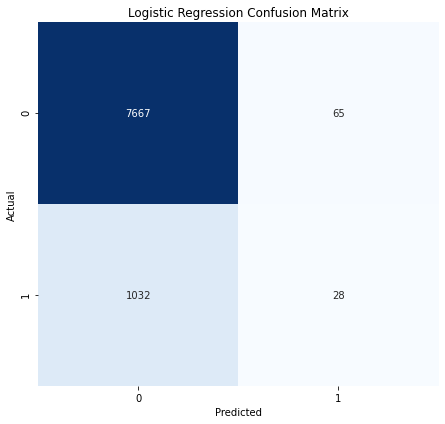

In [79]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

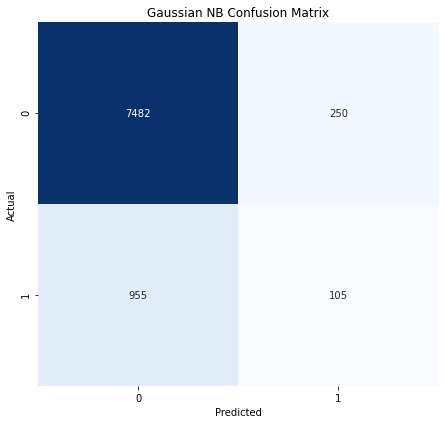

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gaussian NB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [81]:
print('Logistic Regression Classification Report')
print(cr_lr)

Logistic Regression Classification Report
              precision    recall  f1-score   support

       <=50K       0.88      0.99      0.93      7732
        >50K       0.30      0.03      0.05      1060

    accuracy                           0.88      8792
   macro avg       0.59      0.51      0.49      8792
weighted avg       0.81      0.88      0.83      8792



In [82]:
print('Gaussian NB Classification Report')
print(cr_gnb)

Gaussian NB Classification Report
              precision    recall  f1-score   support

       <=50K       0.89      0.97      0.93      7732
        >50K       0.30      0.10      0.15      1060

    accuracy                           0.86      8792
   macro avg       0.59      0.53      0.54      8792
weighted avg       0.82      0.86      0.83      8792



In [83]:
print('Logistic Regression Accuracy Score')
print(accuracy_lr*100, '%')

Logistic Regression Accuracy Score
87.52274795268426 %


In [84]:
print('Gaussian NB Accuracy Score')
print(accuracy_gnb*100, '%')

Gaussian NB Accuracy Score
86.2943585077343 %


<Figure size 864x576 with 0 Axes>

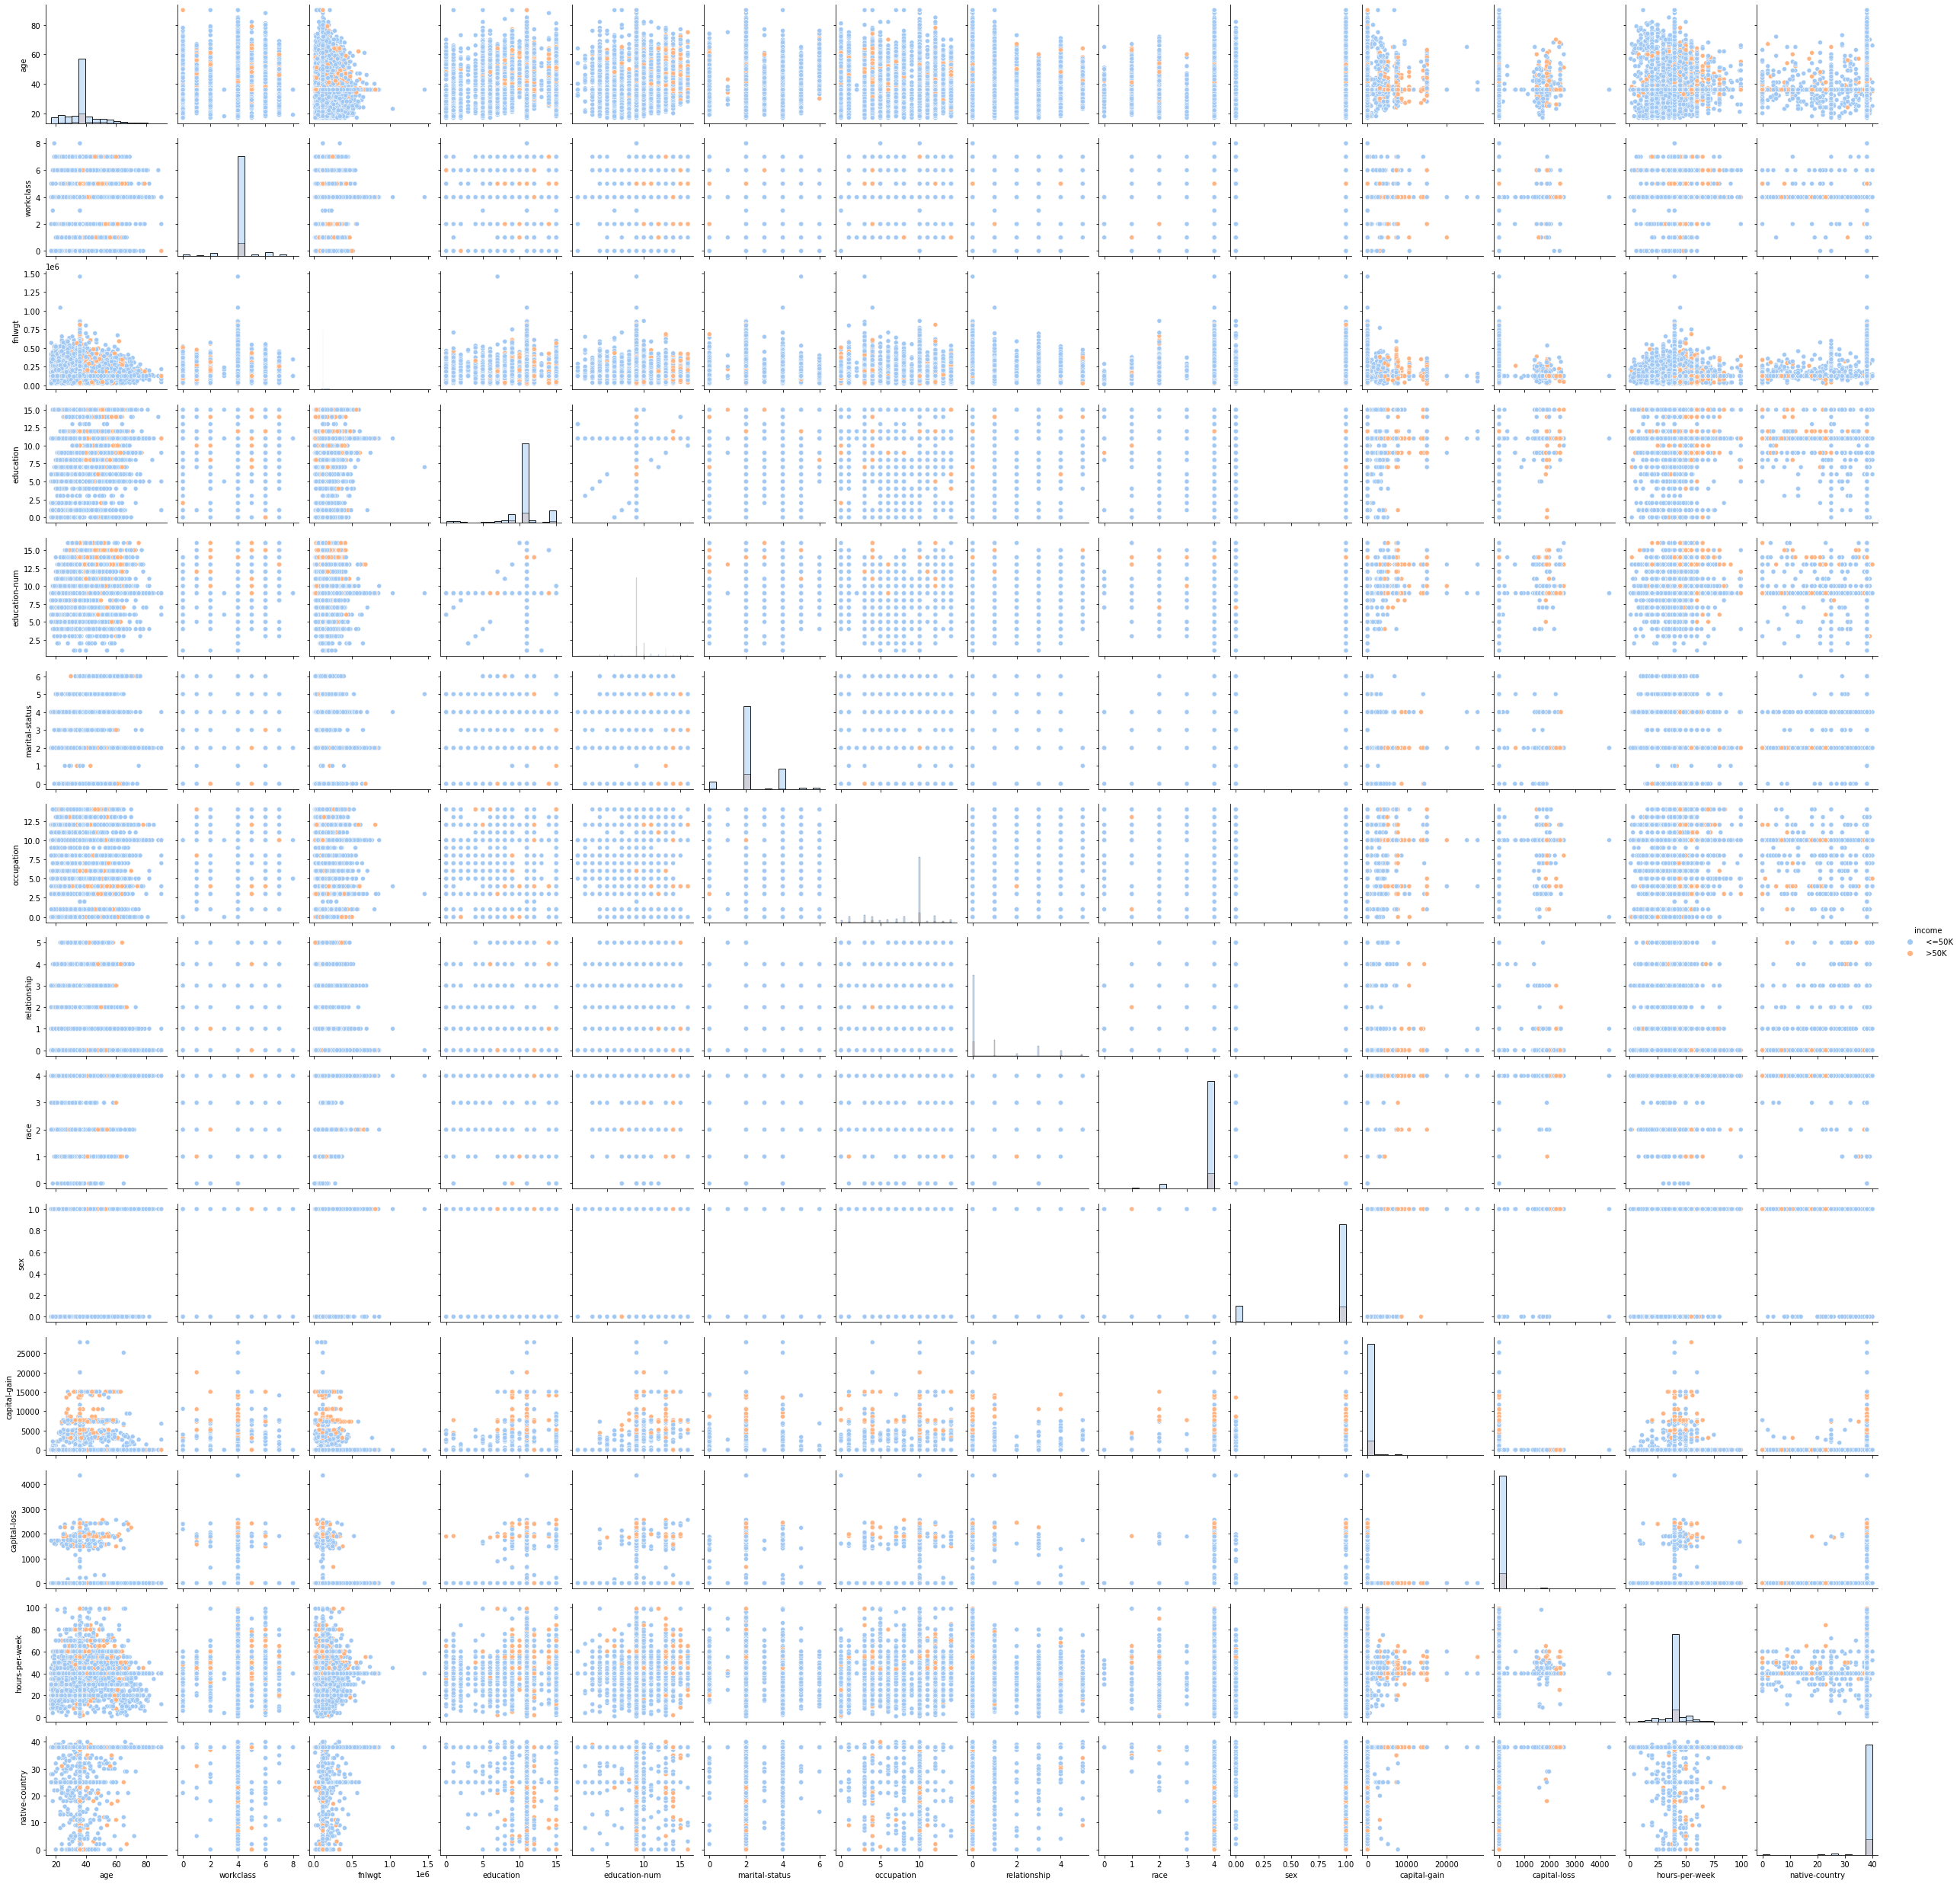

In [85]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='income', diag_kind='hist', palette='pastel')
plt.show()

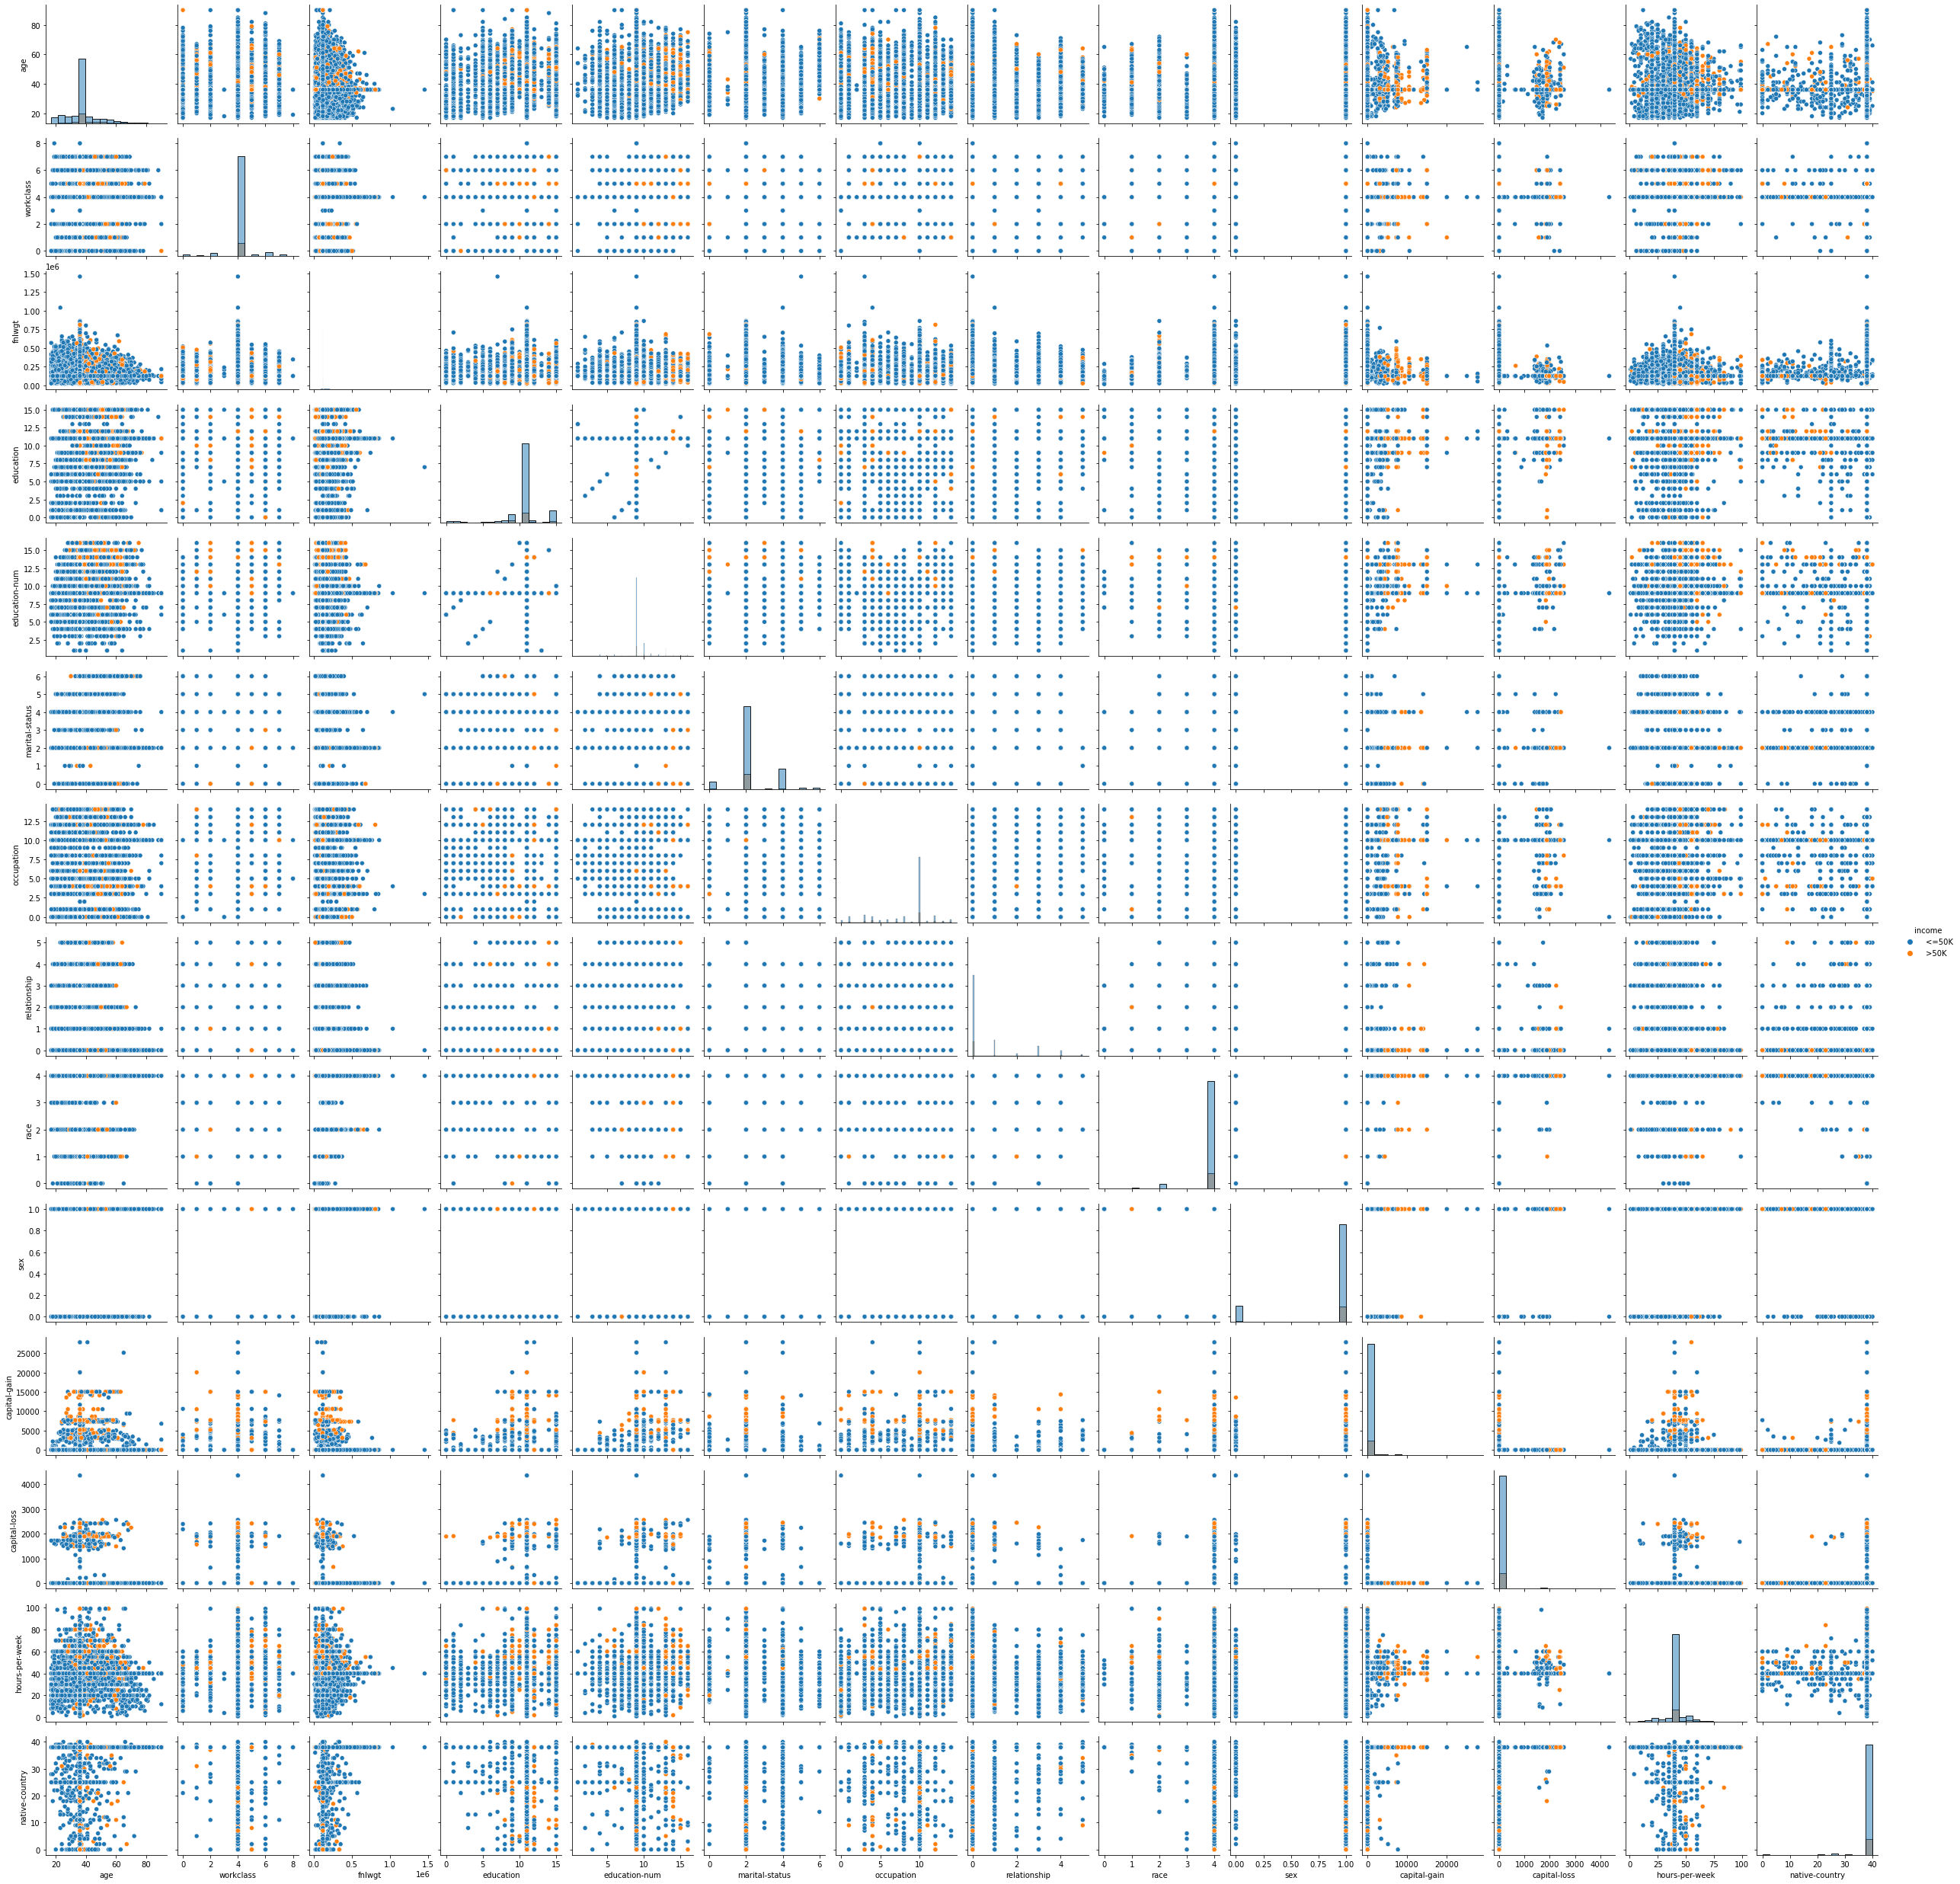

In [87]:
sns.pairplot(df, hue='income', diag_kind='hist')
plt.show()